# Here are the main steps we will go through :
### 1- Importing The Modules and Dataset.
### 2- Discover and visualize the data to gain insights.
### 3- Cleaning and Data Preprocessing .
### 4- Split Data.
### 5- Train The Model.
### 6- Conclusion

# 1- Importing The Modules and Dataset.

In [52]:
import numpy as np 
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix,accuracy_score

In [53]:
df =  pd.read_csv('car_price_prediction.csv')

# 2- Discover and visualize the data to gain insights.

In [54]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [55]:
df.shape

(19237, 18)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [58]:
df.describe(exclude=['int64','float']).T

,count,unique,top,freq
Levy,19237,559,-,5819
Manufacturer,19237,65,HYUNDAI,3769
Model,19237,1590,Prius,1083
Category,19237,11,Sedan,8736
Leather interior,19237,2,Yes,13954
Fuel type,19237,7,Petrol,10150
Engine volume,19237,107,2,3916
Mileage,19237,7687,0 km,721
Gear box type,19237,4,Automatic,13514
Drive wheels,19237,3,Front,12874


In [59]:
# split data to numrical and categorical
numerical_features= df.select_dtypes(include=['int64', 'float64']).copy()
categorical_features = df.select_dtypes(include=['object']).copy()

In [60]:
print ('The numerical features :')
for c in numerical_features:
    print ('  -',c)
print ('===========================')
print ('The categorical features :')
for c in categorical_features:
    print ('  -',c)

The numerical features :
  - ID
  - Price
  - Prod. year
  - Cylinders
  - Airbags
The categorical features :
  - Levy
  - Manufacturer
  - Model
  - Category
  - Leather interior
  - Fuel type
  - Engine volume
  - Mileage
  - Gear box type
  - Drive wheels
  - Doors
  - Wheel
  - Color


- Now we can Know some information about dataset:
  - It is a dataset about cars.
  - It has 18 feature.
  - it has 19237 row.
  - it has datatypes: float64(1), int64(4), object(13).
  - The numerical features (ID,Price,Prod. year,Cylinders,Airbags)
  - The categorical features (Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color)

In [61]:
for c in categorical_features:
    print('=============',c,'============\n\n\n', categorical_features[c].value_counts(),'\n\n\n')

============= Levy ============


 Levy
-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64 



============= Manufacturer ============


 Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64 



============= Model ============


 Model
Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: count, Length: 1590, dtype: int64 



============= Cate

- in Levy column there are a null values ' - '.
- Engine volume , Mileage and Doors coulmns need to smoothing.

### We will visualize data to know more. 

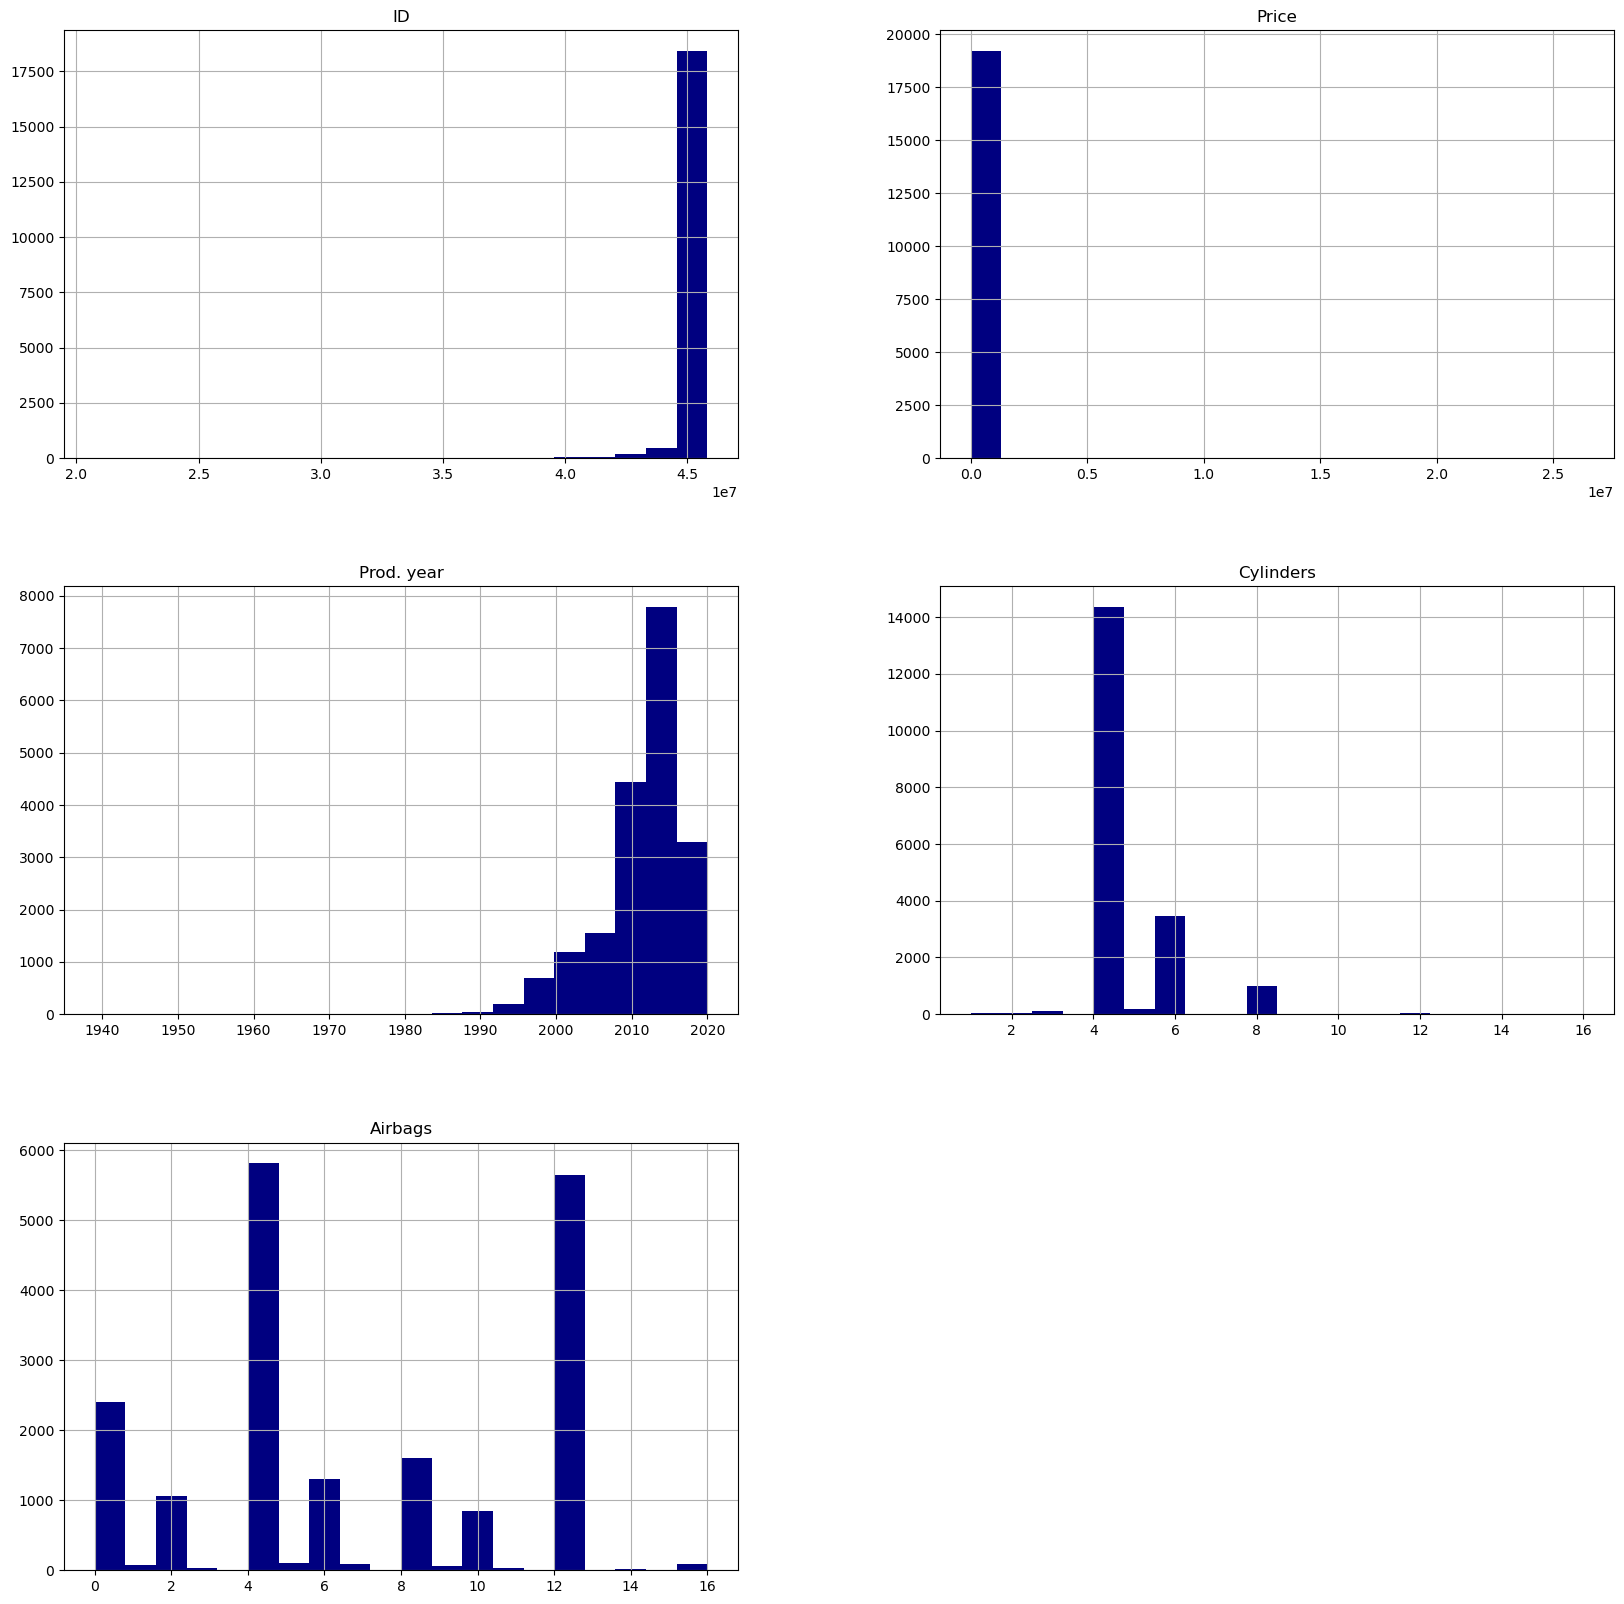

In [62]:
numerical_features.hist(bins=20, figsize=(20,20),color= 'navy')
plt.show()

there are somthing wrong in price column

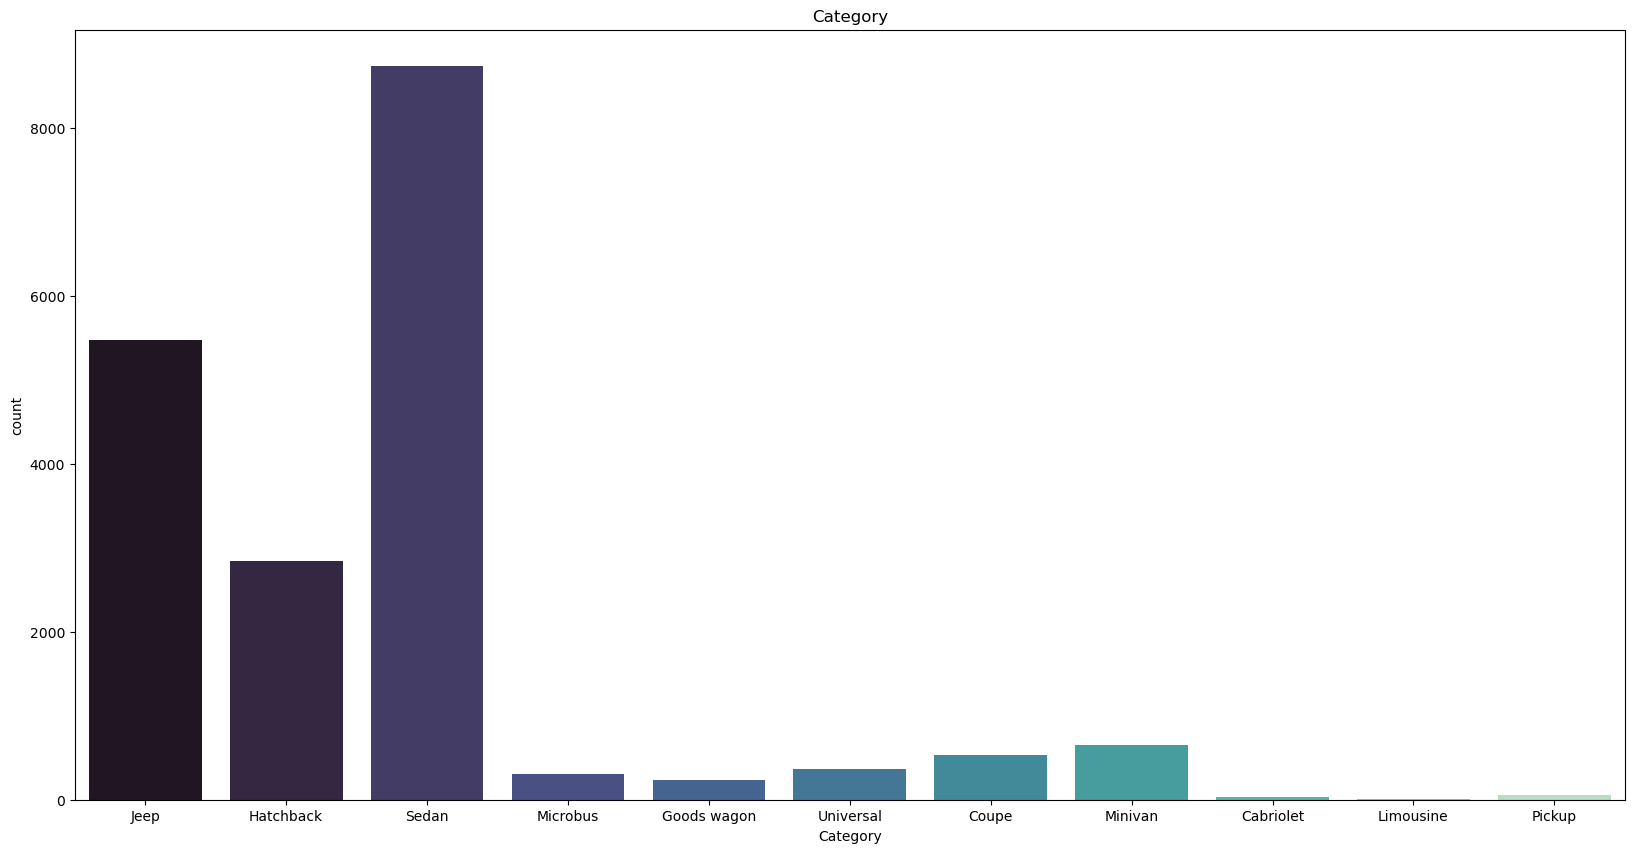

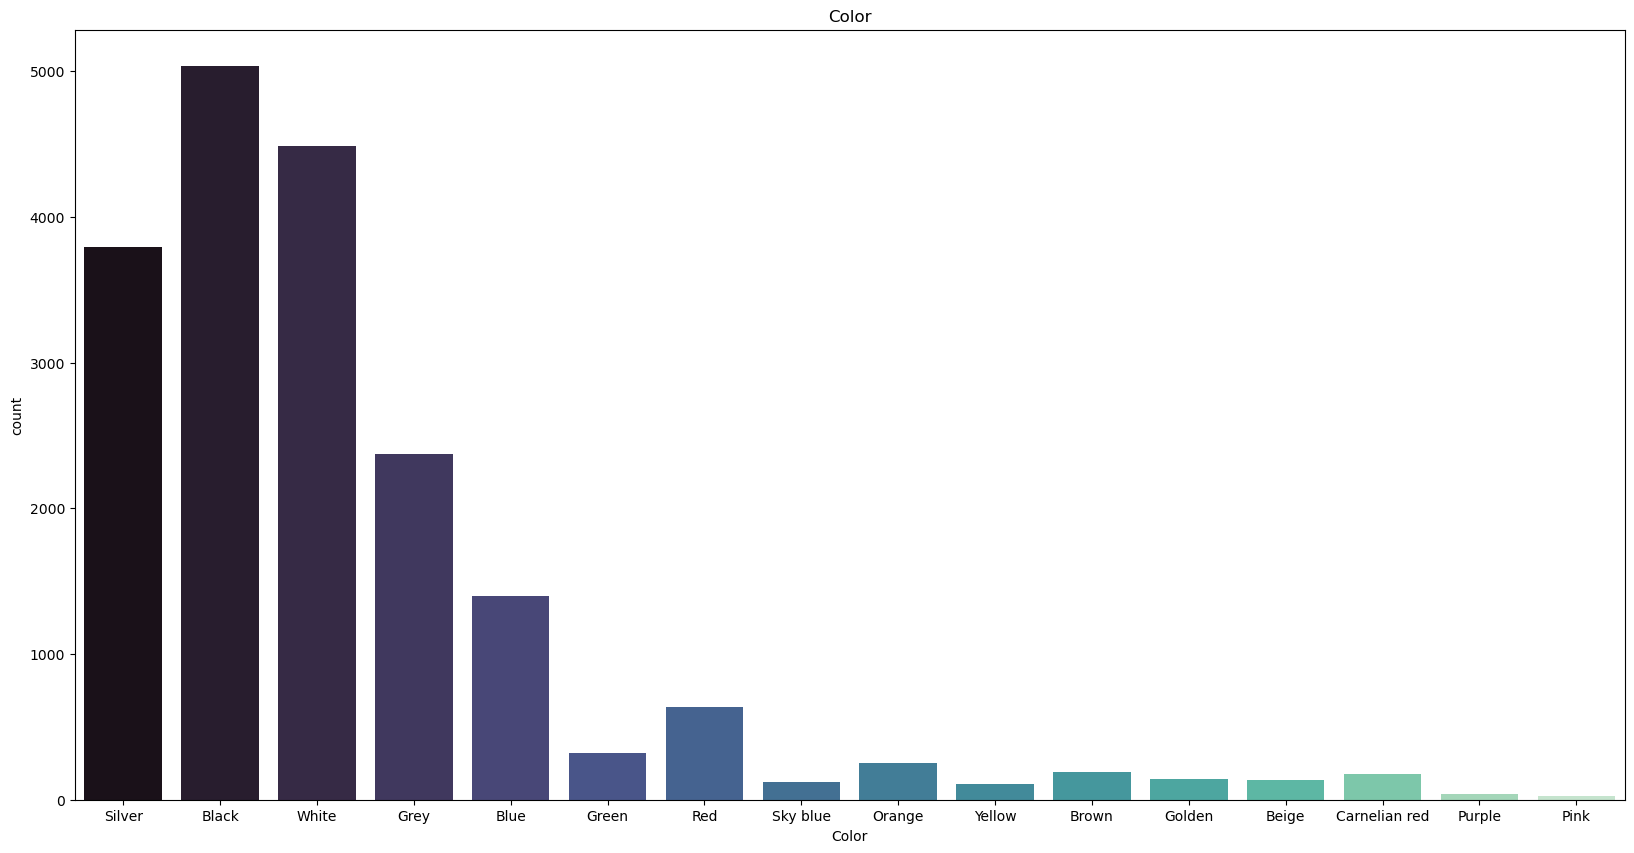

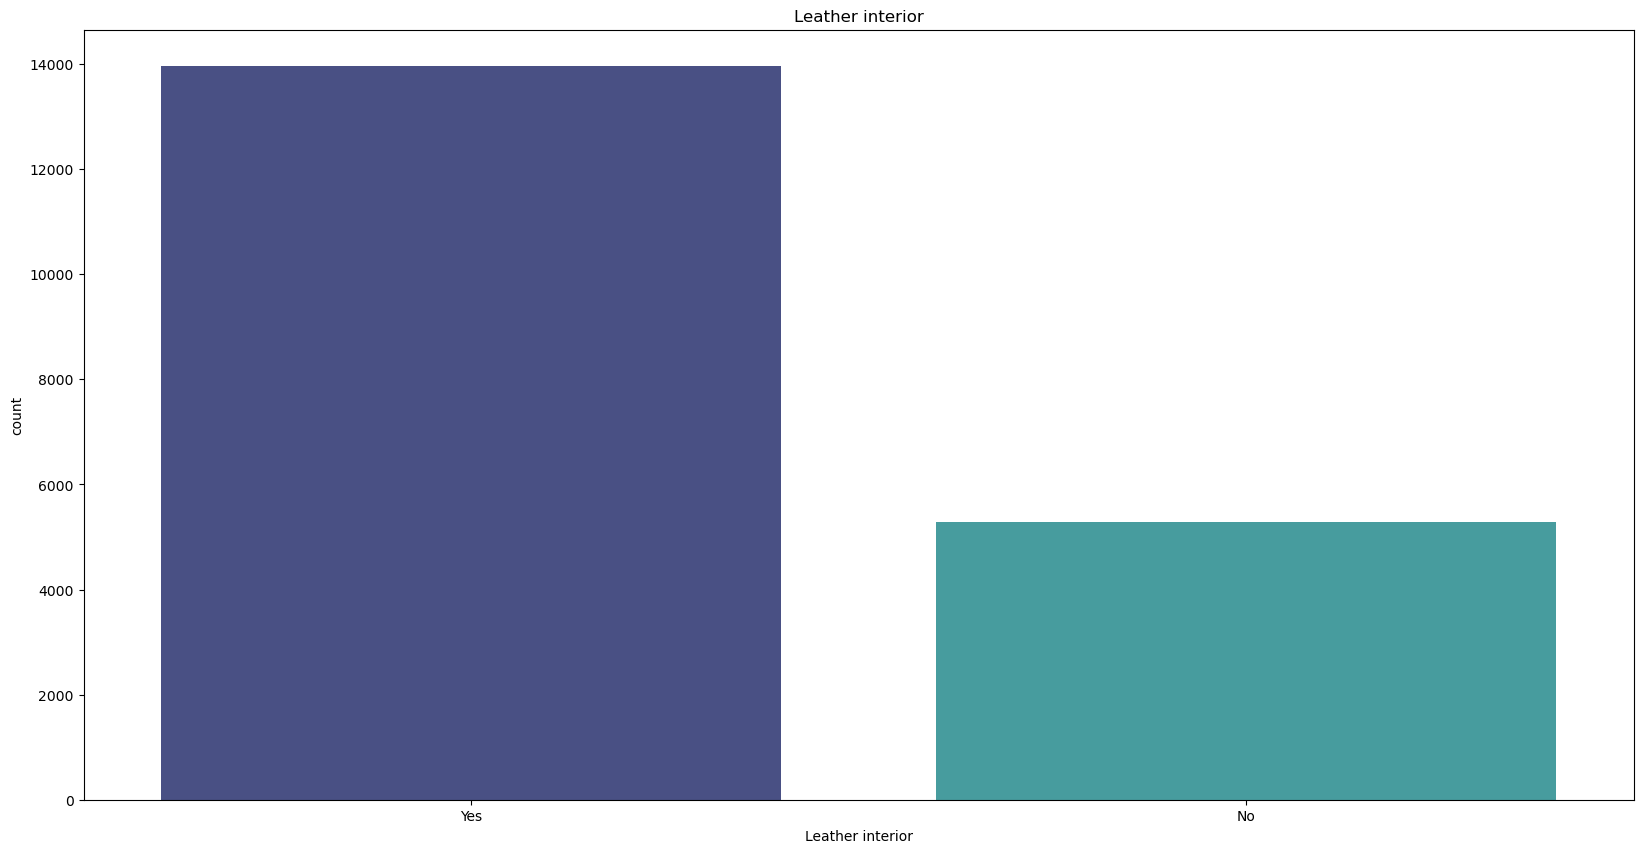

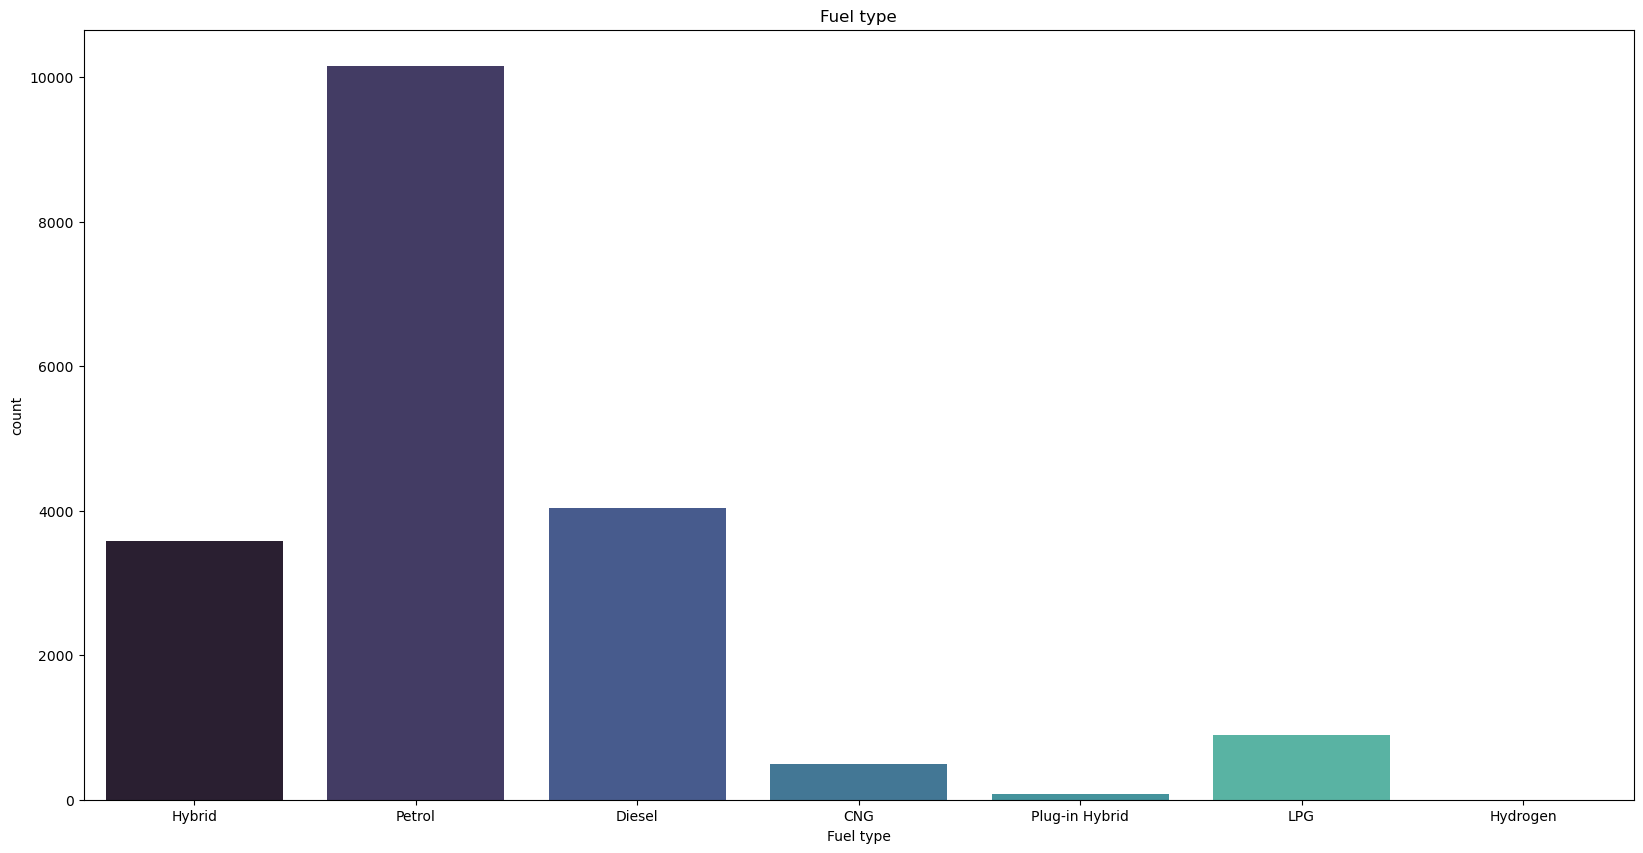

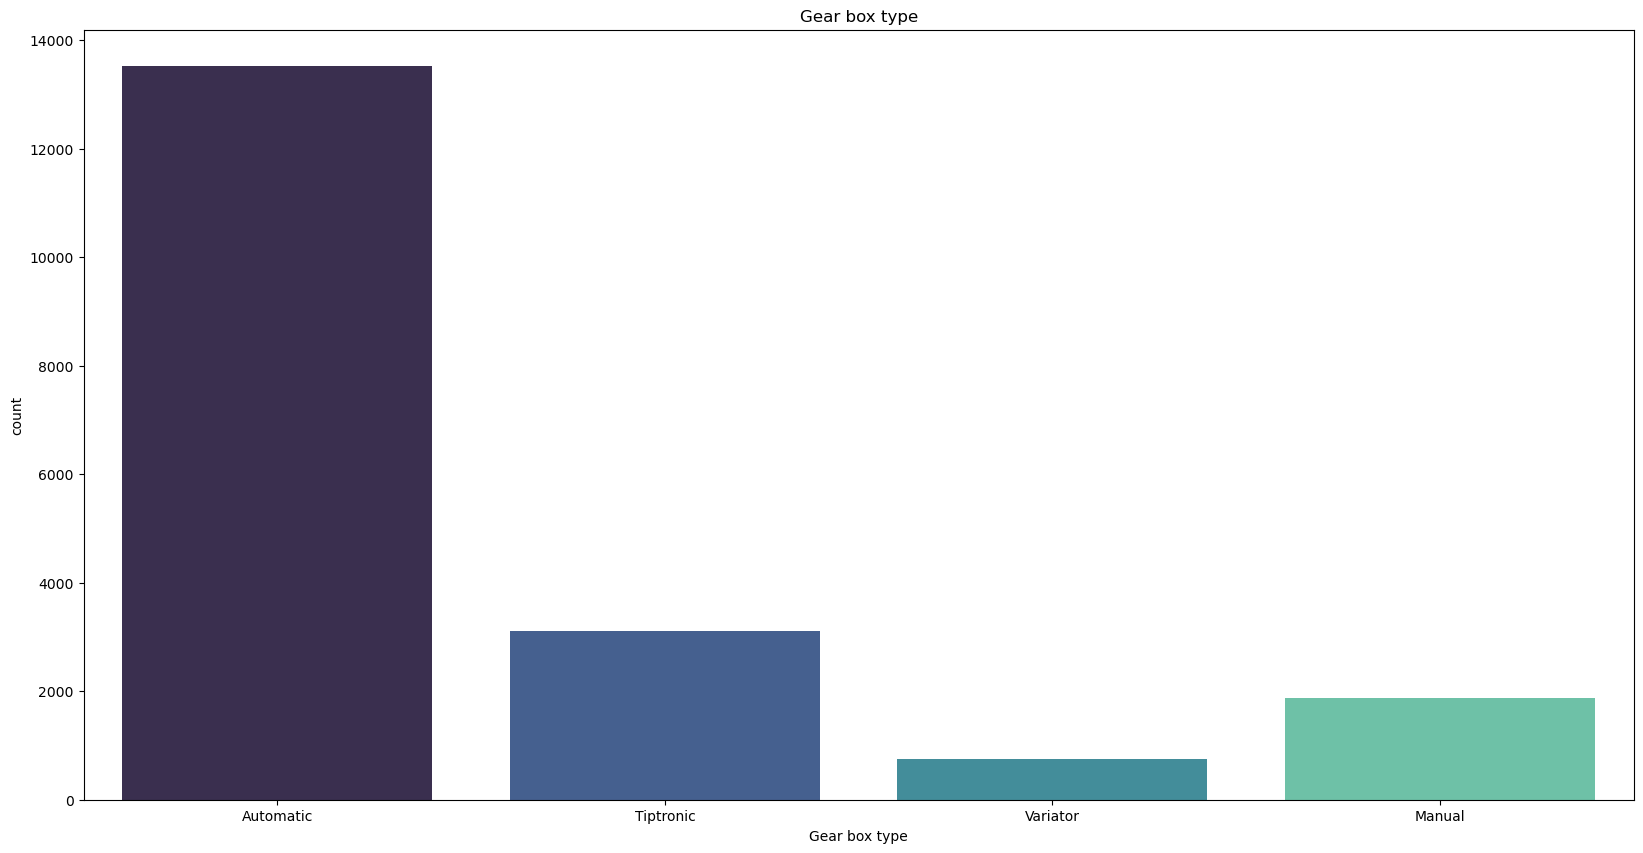

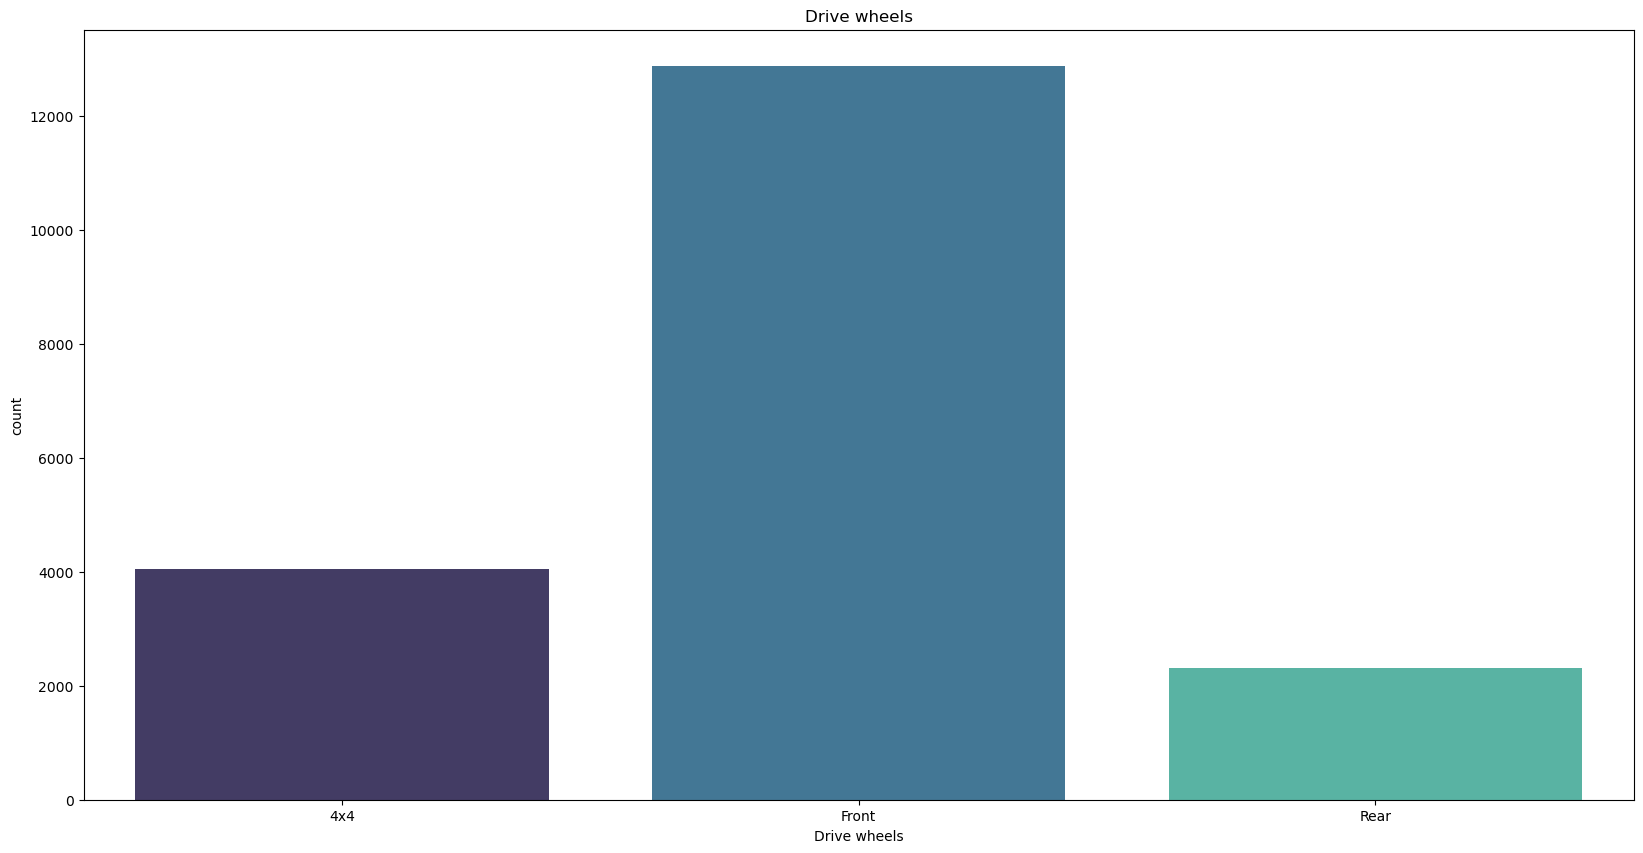

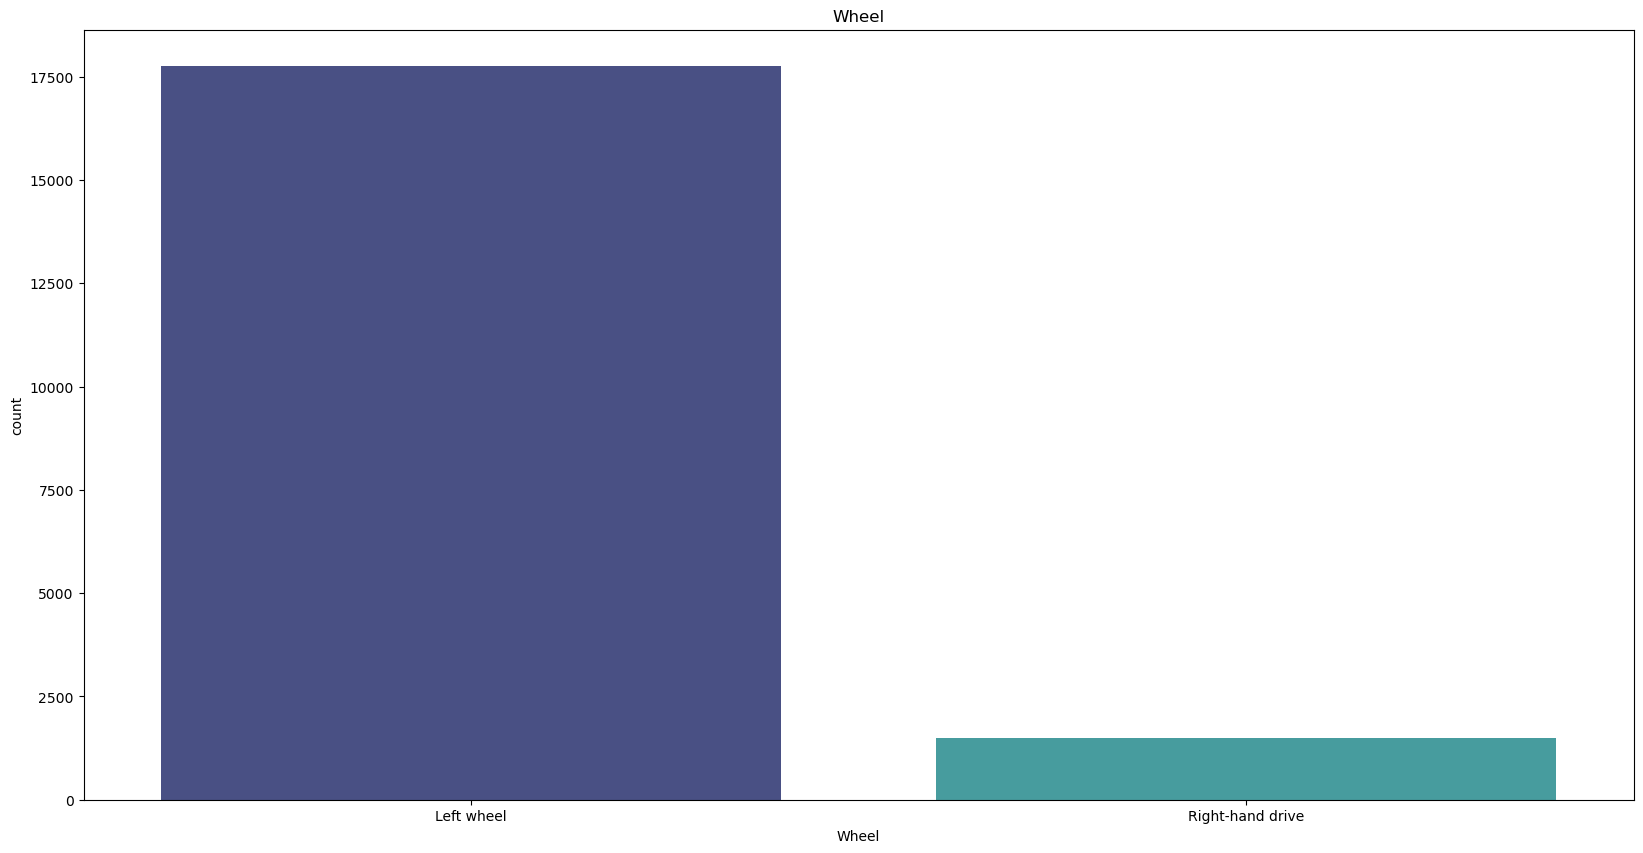

In [63]:
columns =['Category' ,'Color','Leather interior','Fuel type','Gear box type','Drive wheels','Wheel']
for col in columns:
    plt.figure(figsize=(20,10))
    sns.countplot(data=df,x=col,palette='mako')
    plt.title(col)
    plt.show()

- We can know from plots that :
  - Most types of Categories are Sedan, Hatchback, and Jeep.
  - Most colors of cars are Silver, Black, and white.
  - Most wheel is left wheel and drive wheel is front.
  - Most gear box is Auto.
  - Most type of fule is petrol.

# 3- Cleaning and Data Preprocessing .

In [64]:
#checking missing values 
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [65]:
#checking duplicated values 
df.duplicated().sum()

313

In [66]:
#droping duplicated values 
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

In [67]:
#smoothing for Engine volume , Mileage and Doors coulmns 



# Engine volume
df['Engine volume'] = df['Engine volume'].str.lower()

#new coulmn if there turpo or no
df['Turbo'] = df['Engine volume'].str.contains('turbo')
df['Turbo'] = df['Turbo'].astype('object')

df['Engine volume'] = df['Engine volume'].str.slice(0,3)
df['Engine volume'] = df['Engine volume'].astype('float64')



#Mileage 
df['Mileage'] = df['Mileage'].str.replace('km', '')
df['Mileage'] = df['Mileage'].astype('int64')



#Doors
df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)

In [68]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [69]:
#Replacing '-' with null in 'Levy'
df['Levy'].replace({'-': '0'}, inplace = True)
df['Levy'] = df['Levy'].astype('int64')

In [70]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [71]:
#replacing the Prod. year with car age 
dtime = dt.datetime.now()
df['Age']=dtime.year - df['Prod. year']
df = df.drop('Prod. year',axis=1)

In [72]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
0,45654403,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False,13
1,44731507,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False,12
2,45774419,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False,17
3,45769185,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False,12
4,45809263,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False,9


In [73]:
#ID column don't provide any information for our model so we will drop it
df = df.drop('ID', axis=1)

In [74]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False,13
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False,12
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False,17
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False,12
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False,9


In [75]:
# Handling outliers
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        Min = Q1 - 1.5 * IQR
        Max = Q3 + 1.5 * IQR
        # Detect outlier and their indeces
        outlier_list_col = df[(df[c] < Min) | (df[c] > Max)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col)
    
    
    return outlier_indices

In [76]:
features = ['Price','Mileage','Levy','Engine volume','Airbags','Age']
outliers = detect_outliers(df,features)
#dataset without outliers.
car = df.drop(df.loc[outliers].index,axis=0)

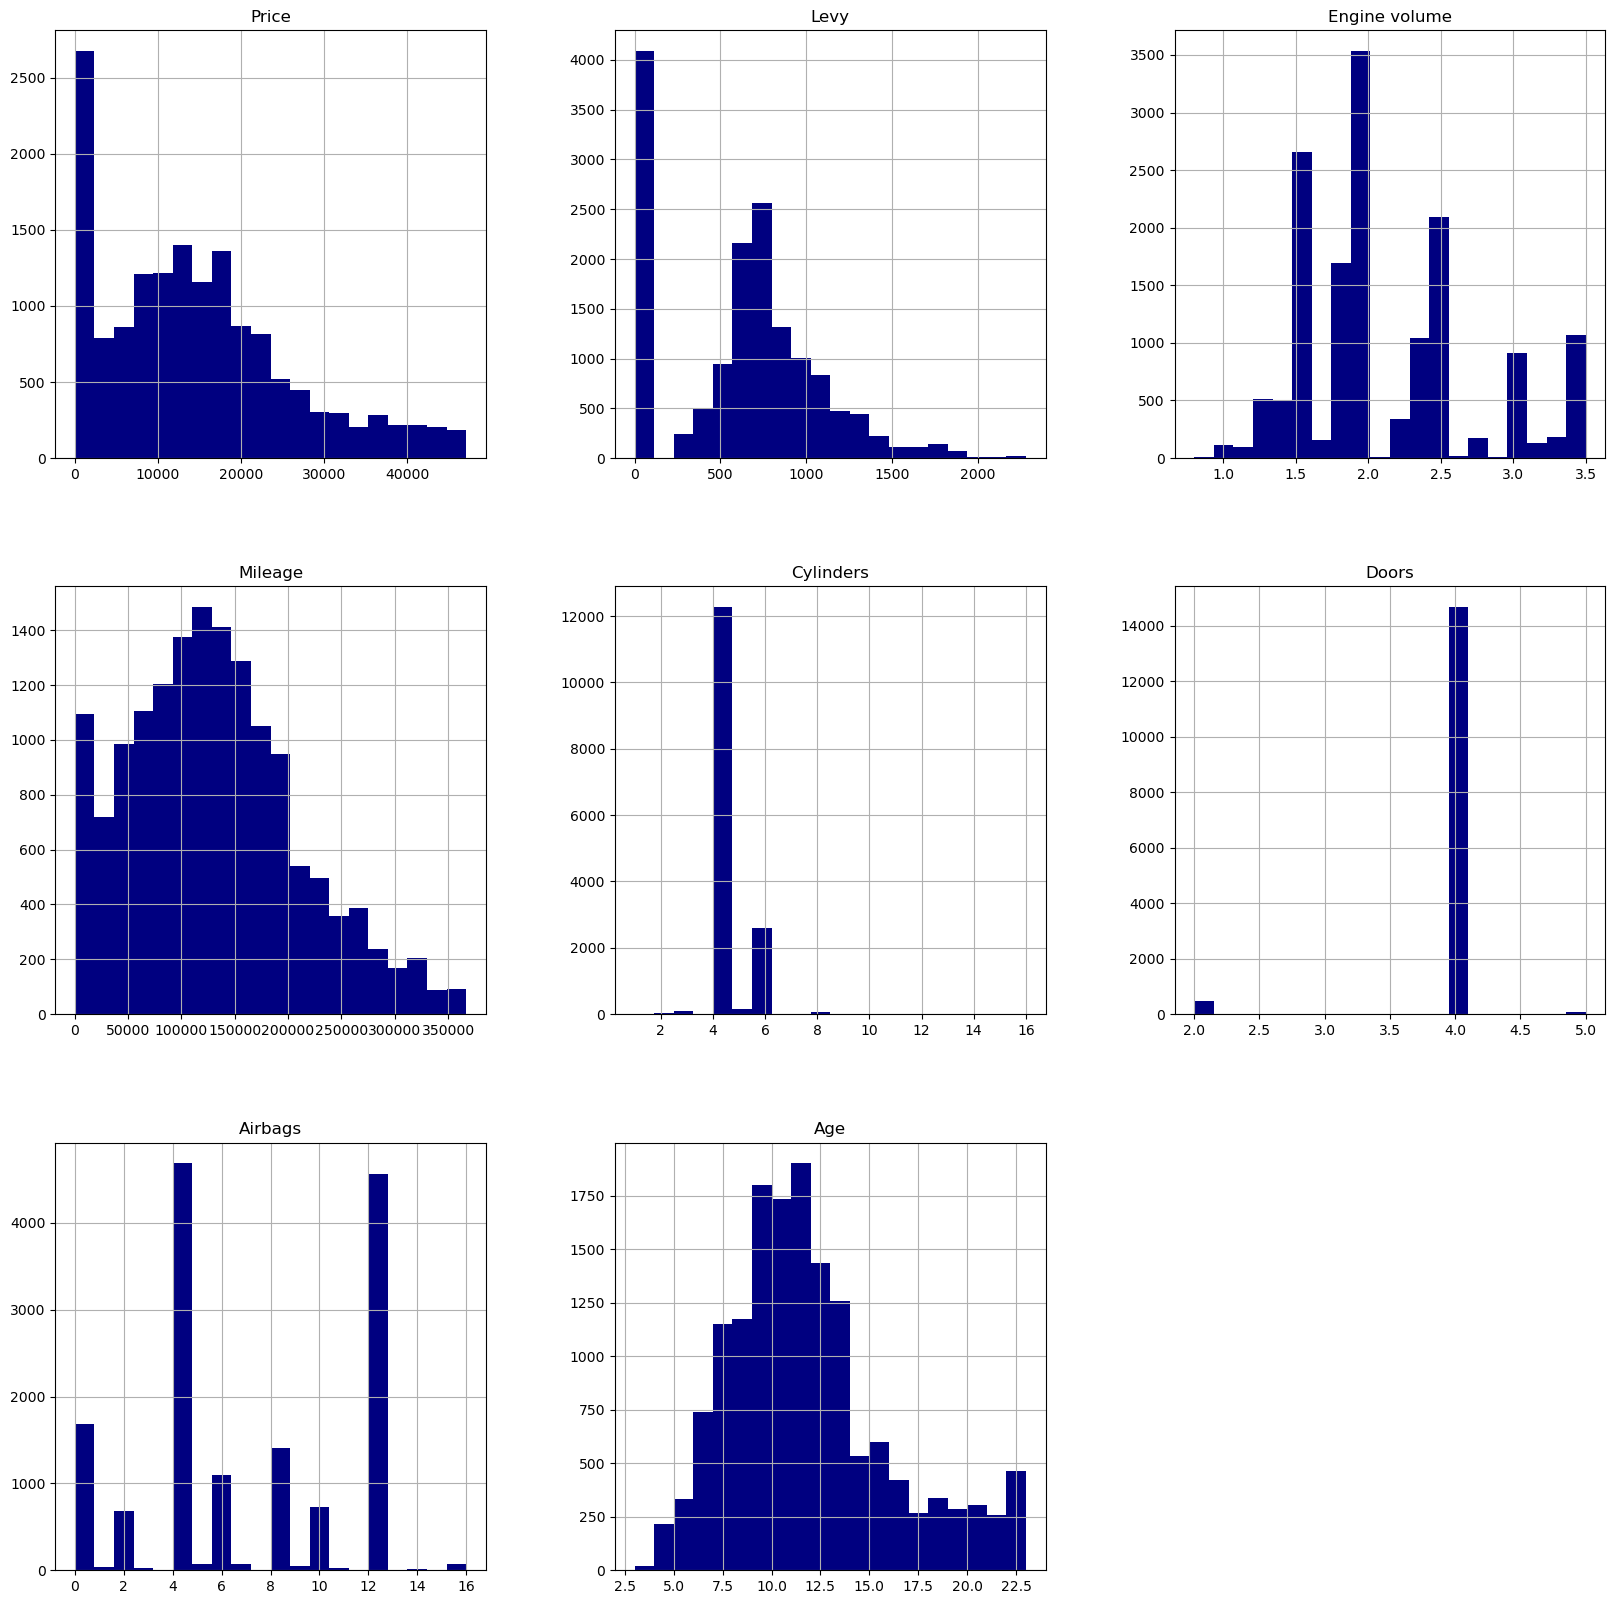

In [77]:
car.hist(bins=20, figsize=(20,20),color= 'navy')
plt.show()

In [78]:
# in logic no car has price loss than 1000 now so we will ignore 
car=car[car.Price > 1000]

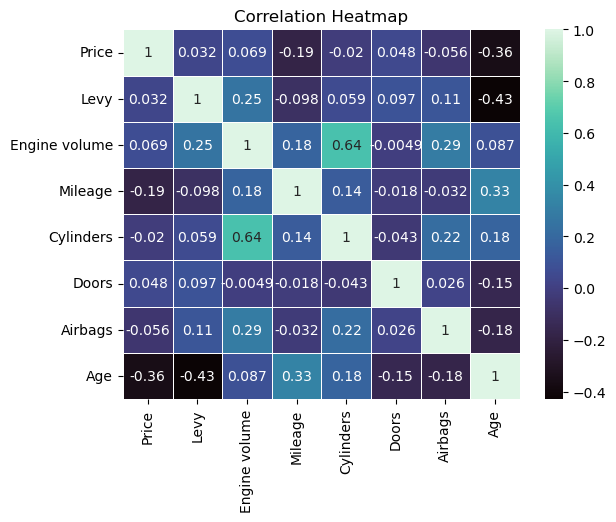

In [79]:
num_car = car.select_dtypes(exclude=object).corr()
sns.heatmap(num_car, annot= True, linewidths= 0.5,cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

In [80]:
# strong relationship between it and the Cylinders column.
car = car.drop('Engine volume', axis=1)

In [81]:
car.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False,13
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False,12
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False,17
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False,12
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False,9


<Axes: xlabel='Price', ylabel='Levy'>

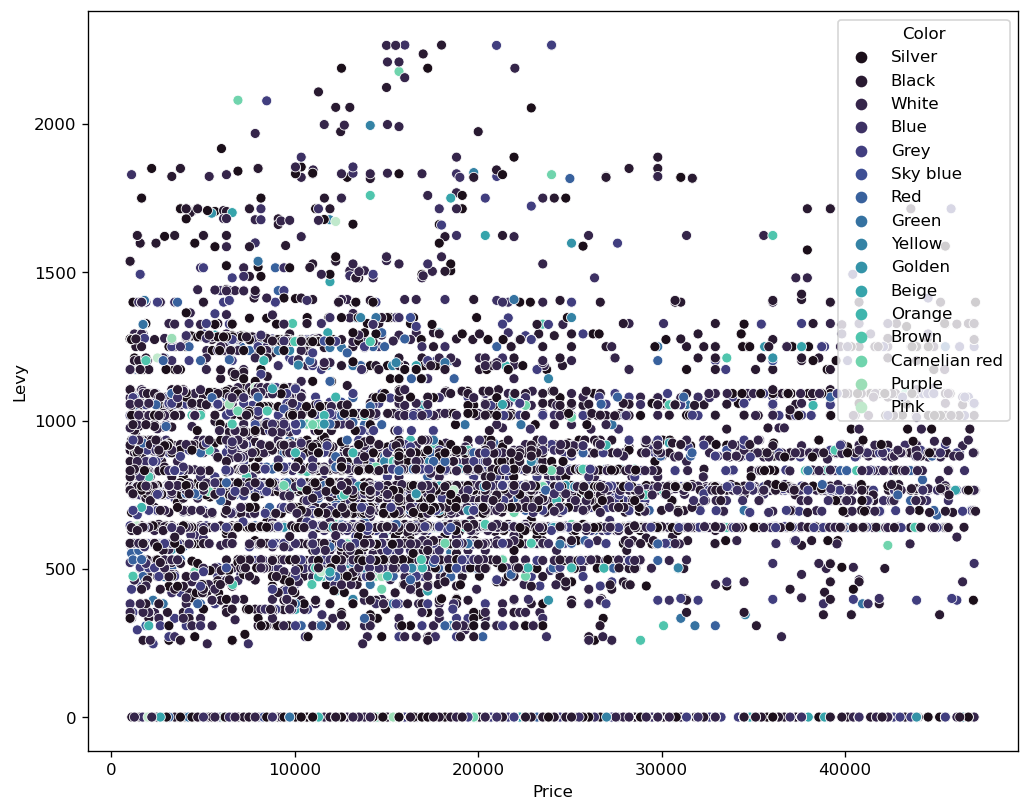

In [82]:
plt.figure(figsize=(10, 8), dpi=120)
sns.scatterplot(data=car, x='Price', y='Levy', hue="Color", palette="mako")

Color doesn't affect on car's price

In [83]:
car = car.drop('Color', axis=1)

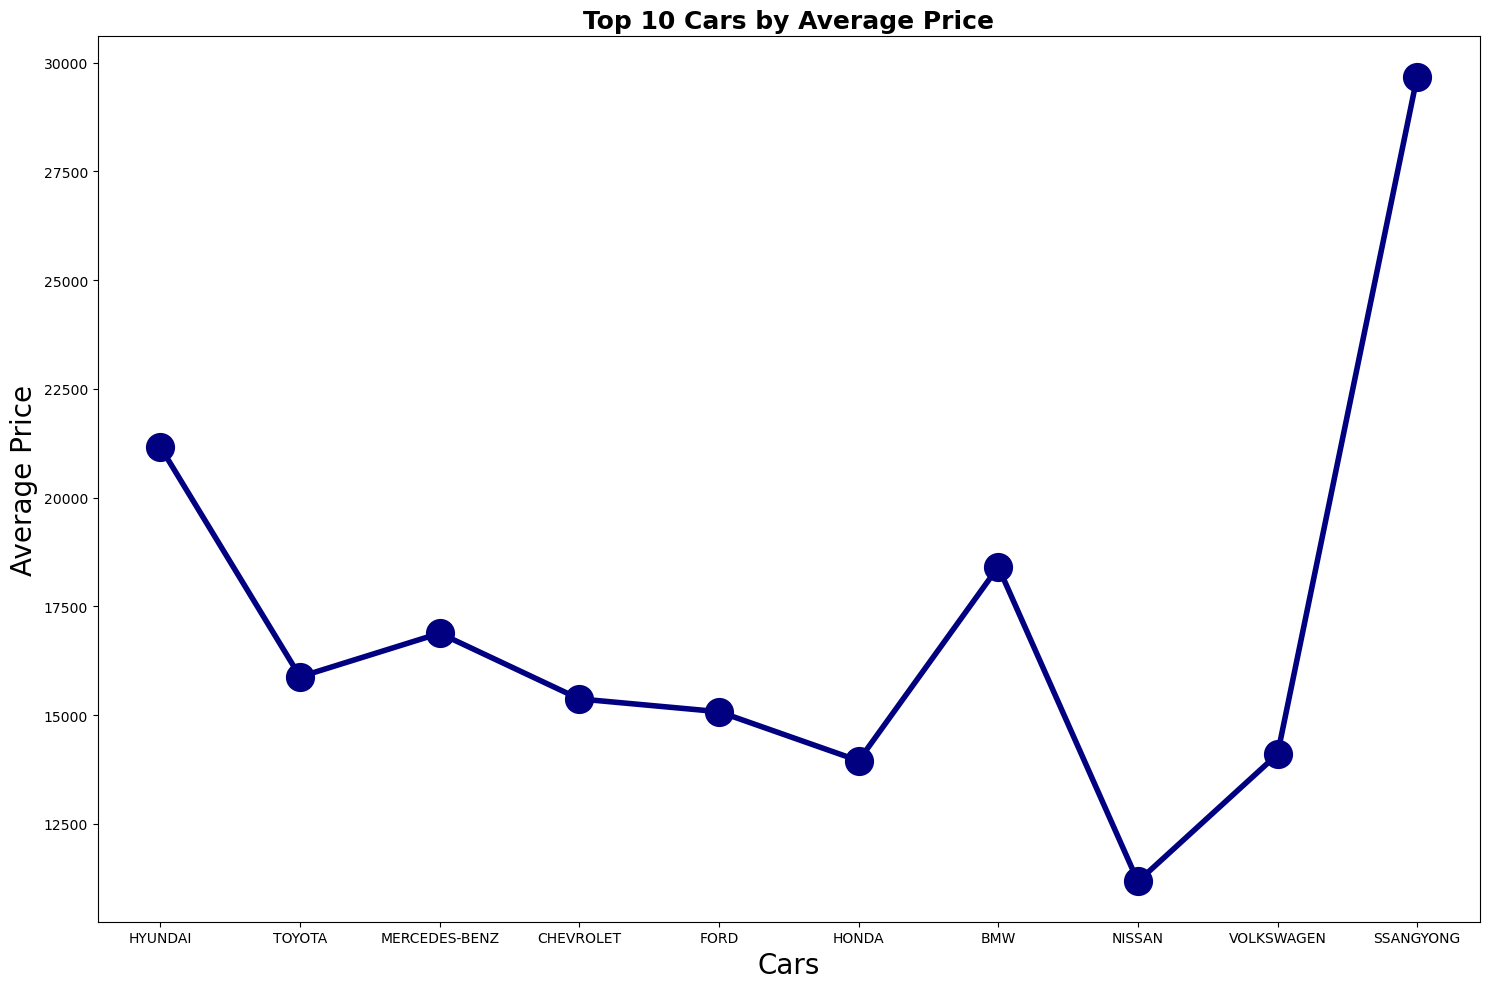

In [84]:
top_10_cars = car.Manufacturer.value_counts().sort_values(ascending=False)[:10]
# Calculate average price for top 10 cars 
top_10_cars_means_prices = [car[car['Manufacturer']==i]['Price'].mean() for i in list(top_10_cars.index)]
plt.figure(figsize=(15,10))
plt.plot(top_10_cars.index,top_10_cars_means_prices,color='navy',
         linewidth = 4,marker='o',markersize = 20)
plt.title('Top 10 Cars by Average Price',loc='center',fontweight='bold',fontsize=18)
plt.ylabel('Average Price',fontsize=20)
plt.xlabel('Cars',fontsize=20)
plt.tight_layout()
plt.show()


### Convert all object columns to numerical by labelencoder (Because ML Model don't understand object columns)


- There are some columns will be transformed using label, and others using oneHotEncoder
    - Label Encoder:
        - Leather interior
        - Manufacturer
        - Model
        - Drive wheels
    - One Hot Encooder
        - Category
        - Fuel type
        - Gear box type
        - Doors
        - Wheel

In [85]:

def encode_columns(df):
    label_encode_cols = ['Leather interior', 'Manufacturer', 'Model', 'Drive wheels','Turbo']
    onehot_encode_cols = ['Category', 'Fuel type', 'Gear box type', 'Doors', 'Wheel']
    
    label_encoder = LabelEncoder()
    for col in label_encode_cols:
        df[col] = label_encoder.fit_transform(df[col])
    df = pd.get_dummies(df, columns=onehot_encode_cols)
    return df

In [86]:
car_test = encode_columns(car)

In [87]:
car_test.head()

,Price,Levy,Manufacturer,Model,Leather interior,Mileage,Cylinders,Drive wheels,Airbags,Turbo,...,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Doors_2,Doors_4,Doors_5,Wheel_Left wheel,Wheel_Right-hand drive
0,13328,1399,28,933,1,186005,6.0,0,12,0,...,False,True,False,False,False,False,True,False,True,False
1,16621,1018,6,494,0,192000,6.0,0,8,0,...,False,False,False,True,False,False,True,False,True,False
2,8467,0,18,513,0,200000,4.0,1,2,0,...,False,False,False,False,True,False,True,False,False,True
3,3607,862,13,496,1,168966,4.0,0,0,0,...,False,True,False,False,False,False,True,False,True,False
4,11726,446,18,513,1,91901,4.0,1,4,0,...,False,True,False,False,False,False,True,False,True,False


In [88]:
car_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13164 entries, 0 to 19235
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     13164 non-null  int64  
 1   Levy                      13164 non-null  int64  
 2   Manufacturer              13164 non-null  int32  
 3   Model                     13164 non-null  int32  
 4   Leather interior          13164 non-null  int32  
 5   Mileage                   13164 non-null  int64  
 6   Cylinders                 13164 non-null  float64
 7   Drive wheels              13164 non-null  int32  
 8   Airbags                   13164 non-null  int64  
 9   Turbo                     13164 non-null  int32  
 10  Age                       13164 non-null  int64  
 11  Category_Cabriolet        13164 non-null  bool   
 12  Category_Coupe            13164 non-null  bool   
 13  Category_Goods wagon      13164 non-null  bool   
 14  Category_Ha

# 4- Split Data.

In [89]:
X = car_test.drop(['Price'], axis=1).values
y = car_test['Price'].values

### Scaling

In [90]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
(X[0], y[0])

(array([ 1.81434299, -0.04246156,  0.98072712,  0.6547484 ,  0.76987463,
         1.93225425, -1.89894408,  1.35798229, -0.35060056,  0.34814209,
        -0.0337753 , -0.16258151, -0.11127335, -0.44880257,  1.73768294,
        -0.00871611, -0.12004212, -0.21039163, -0.04362032, -0.92940694,
        -0.15140444, -0.12732325, -0.55687653,  2.07404224, -0.00871611,
        -0.20682279, -1.02289963, -0.07965601,  0.66780073, -0.29027564,
        -0.46785563, -0.23211806, -0.18726561,  0.20441471, -0.07917168,
         0.31130145, -0.31130145]),
 13328)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)

# 5- Train The Model.

## - LinearRegression

In [92]:
# Model training
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

In [93]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f'Mean Squared Error: {mse}')
print(f"R-squared: {r2}")

lr_score = lr.score(X_test,y_test)
print(f'The Score of Model is :{lr_score}')

Mean Absolute Error: 6432.696726903207
Mean Squared Error: 69468901.78397739
R-squared: 0.3912666300984766
The Score of Model is :0.3912666300984766


## - KNN

In [95]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [96]:
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [97]:
knn = KNeighborsRegressor(n_neighbors = 7, p = 1, weights = 'distance')
knn.fit(X_train, y_train)
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [98]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f'Mean Squared Error: {mse}')
print(f"R-squared: {r2}")
knn_score = knn.score(X_test,y_test)
print(f'The Score of Model is :{knn_score}')

Mean Absolute Error: 3306.582465837797
Mean Squared Error: 28467531.04815926
R-squared: 0.75054829337004
The Score of Model is :0.75054829337004


# 6- Conclusion

In [99]:
print(f'The Score of LinearRegression Model is :{lr_score:.2%}')
print(f'The Score of KNeighborsRegressor Model is :{knn_score:.2%}')

The Score of LinearRegression Model is :39.13%
The Score of KNeighborsRegressor Model is :75.05%
